### 可视化视图都有哪些？
按照数据之间的关系，我们可以把可视化视图划分为 4 类，它们分别是比较、联系、构成和分布。我来简单介绍下这四种关系的特点：
1. 比较：比较数据间各类别的关系，或者是它们随着时间的变化趋势，比如<b>折线图</b>；
2. 联系：查看两个或两个以上变量之间的关系，比如<b>散点图</b>；
3. 构成：每个部分占整体的百分比，或者是随着时间的百分比变化，比如<b>饼图</b>；
4. 分布：关注单个变量，或者多个变量的分布情况，比如<b>直方图</b>。

#### 同样，按照变量的个数，我们可以把可视化视图划分为单变量分析和多变量分析。
1. 单变量分析: 指的是一次只关注一个变量。比如我们只关注“身高”这个变量，来看身高的取值分布，而暂时忽略其他变量。
2. 多变量分析: 可以让你在一张图上可以查看两个以上变量的关系。比如“身高”和“年龄”，你可以理解是同一个人的两个参数，这样在同一张图中可以看到每个人的“身高”和“年龄”的取值，从而分析出来这两个变量之间是否存在某种联系。
<img src="./images/15-01.png">

散點圖
====
#### 散点图的英文叫做 scatter plot，它将两个变量的值显示在二维坐标中，非常适合展示两个变量之间的关系。当然，除了二维的散点图，我们还有三维的散点图。
**1. Matplotlib:**
```python
import matplotlib.pyplot as plt
plt.scatter(x, y, marker=None) 
```
函数。x、y 是坐标，marker 代表了标记的符号。比如“x”、“>”或者“o”。选择不同的 marker，呈现出来的符号样式也会不同，你可以自己试一下。

**2. Seaborn 进行散点图的绘制**
```python
import seaborn as sns
sns.jointplot(x, y, data=None, kind=‘scatter’)
```
x、y 是 data 中的下标。data 就是我们要传入的数据，一般是 DataFrame 类型。kind 这类我们取 scatter，代表散点的意思。当然 kind 还可以取其他值，这个我在后面的视图中会讲到，不同的 kind 代表不同的视图绘制方式。

模拟下，假设我们的数据是随机的 1000 个点: 
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 数据准备
N = 1000
x = np.random.randn(N)
y = np.random.randn(N)
# 用Matplotlib画散点图
plt.scatter(x, y,marker='x')
plt.show()
# 用Seaborn画散点图
df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x="x", y="y", data=df, kind='scatter');
plt.show()
```
**Matplotlib 默认情况下呈现出来的是个长方形。而 Seaborn 呈现的是个正方形，而且不仅显示出了散点图，还给了这两个变量的分布情况。**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 数据准备
N = 1000
x = np.random.randn(N)
y = np.random.randn(N)
# 用Matplotlib画散点图
plt.scatter(x, y,marker='x')
plt.show()
# 用Seaborn画散点图
df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x="x", y="y", data=df, kind='scatter');
plt.show()

折线图
====
折线图可以用来表示数据随着时间变化的趋势。
1. Matplotlib 中，我们可以直接使用 plt.plot() 函数，当然需要提前把数据按照 x 轴的大小进行排序，要不画出来的折线图就无法按照 x 轴递增的顺序展示。
2. Seaborn 中，我们使用 sns.lineplot (x, y, data=None) 函数。其中 x、y 是 data 中的下标。data 就是我们要传入的数据，一般是 DataFrame 类型。
**这里我们设置了 x、y 的数组。x 数组代表时间（年），y 数组我们随便设置几个取值。下面是详细的代码。**
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 数据准备
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y = [5, 3, 6, 20, 17, 16, 19, 30, 32, 35]
# 使用Matplotlib画折线图
plt.plot(x, y)
plt.show()
# 使用Seaborn画折线图
df = pd.DataFrame({'x': x, 'y': y})
sns.lineplot(x="x", y="y", data=df)
plt.show()
```


In [ ]:
# 数据准备
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y = [5, 3, 6, 20, 17, 16, 19, 30, 32, 35]
# 使用Matplotlib画折线图
plt.plot(x, y)
plt.show()
# 使用Seaborn画折线图
df = pd.DataFrame({'x': x, 'y': y})
sns.lineplot(x="x", y="y", data=df)
plt.show()

直方图
====
直方图是比较常见的视图，它是把横坐标等分成了一定数量的小区间，这个小区间也叫作“箱子”，然后在每个“箱子”内用矩形条（bars）展示该箱子的箱子数（也就是 y 值），这样就完成了对数据集的直方图分布的可视化。

1. Matplotlib 中，我们使用 plt.hist(x, bins=10) 函数，其中参数 x 是一维数组，bins 代表直方图中的箱子数量，默认是 10。
2. Seaborn 中，我们使用 sns.distplot(x, bins=10, kde=True) 函数。其中参数 x 是一维数组，bins 代表直方图中的箱子数量，kde 代表显示核密度估计，默认是 True，我们也可以把 kde 设置为 False，不进行显示。核密度估计是通过核函数帮我们来估计概率密度的方法。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 数据准备
a = np.random.randn(100)
s = pd.Series(a) 
# 用Matplotlib画直方图
plt.hist(s)
plt.show()
# 用Seaborn画直方图
sns.distplot(s, kde=False)
plt.show()
sns.distplot(s, kde=True)
plt.show()

条形图
====
如果说通过直方图可以看到变量的数值分布，那么条形图可以帮我们查看类别的特征。在条形图中，长条形的长度表示类别的频数，宽度表示类别。

1. 在 Matplotlib 中，我们使用 plt.bar(x, height) 函数，其中参数 x 代表 x 轴的位置序列，height 是 y 轴的数值序列，也就是柱子的高度。
2. 在 Seaborn 中，我们使用 sns.barplot(x=None, y=None, data=None) 函数。其中参数 data 为 DataFrame 类型，x、y 是 data 中的变量。

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 数据准备
x = ['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5']
y = [5, 4, 8, 12, 7]
# 用Matplotlib画条形图
plt.bar(x, y)
plt.show()
# 用Seaborn画条形图
sns.barplot(x, y)
plt.show()

箱线图
====
箱线图，又称盒式图，它是在 1977 年提出的，由五个数值点组成：最大值 (max)、最小值 (min)、中位数 (median) 和上下四分位数 (Q3, Q1)。它可以帮我们分析出数据的差异性、离散程度和异常值等。
1. 在 Matplotlib 中，我们使用 plt.boxplot(x, labels=None) 函数，其中参数 x 代表要绘制箱线图的数据，labels 是缺省值，可以为箱线图添加标签。
2. 在 Seaborn 中，我们使用 sns.boxplot(x=None, y=None, data=None) 函数。其中参数 data 为 DataFrame 类型，x、y 是 data 中的变量

**这段代码中，我生成 0-1 之间的 10*4 维度数据，然后分别用 Matplotlib 和 Seaborn 进行箱线图的展示，结果如下。**

In [ ]:
# 数据准备
# 生成10*4维度数据
data=np.random.normal(size=(10,4)) #十組資料，每組4個元素
lables = ['A','B','C','D']
# 用Matplotlib画箱线图
plt.boxplot(data,labels=lables)
plt.show()
# 用Seaborn画箱线图
df = pd.DataFrame(data, columns=lables)
sns.boxplot(data=df)
plt.show()

饼图
====
饼图是常用的统计学模块，可以显示每个部分大小与总和之间的比例。在 Python 数据可视化中，它用的不算多。我们主要采用 Matplotlib 的 pie 函数实现它。

**在 Matplotlib 中，我们使用 plt.pie(x, labels=None) 函数**，其中参数 x 代表要绘制饼图的数据，labels 是缺省值，可以为饼图添加标签。

这里我设置了 lables 数组，分别代表高中、本科、硕士、博士和其他几种学历的分类标签。nums 代表这些学历对应的人数。

In [ ]:
import matplotlib.pyplot as plt
# 数据准备
nums = [25, 37, 33, 37, 6]
labels = ['High-school','Bachelor','Master','Ph.d', 'Others']
# 用Matplotlib画饼图
plt.pie(x = nums, labels=labels)
plt.show()

热力图
====
热力图，英文叫 heat map，是一种矩阵表示方法，其中矩阵中的元素值用颜色来代表，不同的颜色代表不同大小的值。通过颜色就能直观地知道某个位置上数值的大小。另外你也可以将这个位置上的颜色，与数据集中的其他位置颜色进行比较。
* 热力图是一种非常直观的多元变量分析方法。
* 我们一般使用 **Seaborn 中的 sns.heatmap(data) 函数**，其中 data 代表需要绘制的热力图数据。

这里我们使用 Seaborn 中自带的数据集 flights，该数据集记录了 1949 年到 1960 年期间，每个月的航班乘客的数量。

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 数据准备
flights = sns.load_dataset("flights")
data=flights.pivot('year','month','passengers')
# 用Seaborn画热力图
sns.heatmap(data)
plt.show()

蜘蛛图
====
蜘蛛图是一种显示一对多关系的方法。在蜘蛛图中，一个变量相对于另一个变量的显著性是清晰可见的。
* 假设我们想要给王者荣耀的玩家做一个战力图，指标一共包括推进、KDA、生存、团战、发育和输出。那该如何做呢？
* 这里我们需要使用 Matplotlib 来进行画图，首先设置两个数组：labels 和 stats。他们分别保存了这些属性的名称和属性值。
* 因为蜘蛛图是一个圆形，你需要计算每个坐标的角度，然后对这些数值进行设置。当画完最后一个点后，需要与第一个点进行连线。因为需要计算角度，所以我们要准备 angles 数组；又因为需要设定统计结果的数值，所以我们要设定 stats 数组。并且需要在原有 angles 和 stats 数组上增加一位，也就是添加数组的第一个元素。

代码中 flt.figure 是创建一个空白的 figure 对象，这样做的目的相当于画画前先准备一个空白的画板。然后 add_subplot(111) 可以把画板划分成 1 行 1 列。再用 ax.plot 和 ax.fill 进行连线以及给图形上色。最后我们在相应的位置上显示出属性名。这里需要用到中文，Matplotlib 对中文的显示不是很友好，因此我设置了中文的字体 font，这个需要在调用前进行定义。最后我们可以得到下面的蜘蛛图，看起来是不是很酷？

7 6


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (6).

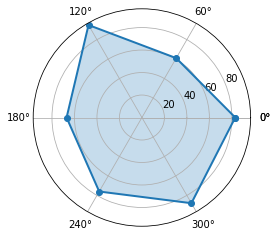

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties  
# 数据准备
labels=np.array([u"推进","KDA",u"生存",u"团战",u"发育",u"输出"])
stats=[83, 61, 95, 67, 76, 88]

# 画图数据准备，角度、状态值
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 用Matplotlib画蜘蛛图
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)   
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)   #畫線條內顏色

print(len(angles), len(labels))
# # 设置中文字体
font = FontProperties(fname=r"C:\Windows\Fonts\msjhbd.ttc")  
ax.set_thetagrids(angles * 180/np.pi, labels, FontProperties=font) 
# # #報錯，值有六個，但labels只抓到五個，沒抓照第一個"推進"
# plt.show()

In [ ]:
help(ax.set_thetagrids)

In [ ]:
dir(ax)

In [ ]:
a = ax.get_axes_locator()

In [ ]:
len(angles * 180/np.pi)
len(angles)

In [ ]:
angles=np.linspace(0, 2*np.pi, 6, endpoint=False)

In [ ]:
len(angles)

In [ ]:
len(labels)

In [7]:
stats

array([83, 61, 95, 67, 76, 88, 83])